C:\Users\julio\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\julio\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.




---------RESULTADOS PARA KNN-----------


-------COM K=1-------------------------


---MATRIZ CONFUSÃO - TABLE VII


[[211  92]
 [123 180]]


---RELATÓRIO DE CLASSIFICAÇÃO - TABLE VI


              precision    recall  f1-score   support

           0       0.63      0.70      0.66       303
           1       0.66      0.59      0.63       303

   micro avg       0.65      0.65      0.65       606
   macro avg       0.65      0.65      0.64       606
weighted avg       0.65      0.65      0.64       606



------COM K=17------------------------


--MATRIZ CONFUSÃO


[[242  61]
 [137 166]]


---RELATÓRIO DE CLASSIFICAÇÃO - TABLE VIII


              precision    recall  f1-score   support

           0       0.64      0.80      0.71       303
           1       0.73      0.55      0.63       303

   micro avg       0.67      0.67      0.67       606
   macro avg       0.68      0.67      0.67       606
weighted avg       0.68      0.67      0.67       606



------------------------

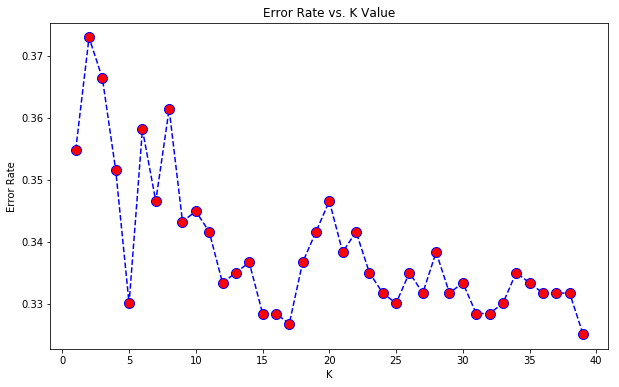

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0

## Obter dados
dataset = pd.read_csv('data.csv')
classes = dataset['target']
# transformando o dataset "classes' em array
classes_array = classes.values
#remove_features(['target','song_title'])
remove_features(['song_title','Unnamed: 0'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Pré-processamento dos dados
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
inteiros = enc.fit_transform(dataset['artist'])
dataset['artist_inteiros'] = inteiros
remove_features(['artist'])
scaler.fit(dataset.drop('target',axis=1))
scaled_features = scaler.transform(dataset.drop('target',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence","artist_inteiros"])
df_feat.head()
## Divisão treino-teste
df_target = classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

# Usando o KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_test,pred))
#print(classification_report(y_test,pred))
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('\n')
print('---------RESULTADOS PARA KNN-----------')
print('\n')
print('-------COM K=1-------------------------')
print('\n')
print('---MATRIZ CONFUSÃO - TABLE VII')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('---RELATÓRIO DE CLASSIFICAÇÃO - TABLE VI')
print('\n')
print(classification_report(y_test,pred))
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('\n')
print('------COM K=17------------------------')
print('\n')
print('--MATRIZ CONFUSÃO')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('---RELATÓRIO DE CLASSIFICAÇÃO - TABLE VIII')
print('\n')
print(classification_report(y_test,pred))
print('\n')
print('--------------------------------------')